In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("playstore-analysis (2) (1).csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#1. Data clean up – Missing value treatment

In [76]:
#a. Drop records where rating is missing since rating is our target/study variable

df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [77]:
#b. Check the null values for the Android Ver column. 

pd.isnull(df['Rating']).sum()


0

In [3]:
pd.isnull(df['Android Ver']).sum()


3

In [4]:
#i. Are all 3 records having the same problem?
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
#ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
df=df.drop(df.index[10472])


In [6]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [7]:
#iii. Replace remaining missing values with the mode

df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace= True)

In [8]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [74]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [10]:
#c. Current ver – replace with most common value
pd.isnull(df['Current Ver']).sum()

8

In [11]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace= True)

In [12]:
df[df['Current Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
#2. Data clean up – correcting the data types

In [13]:
df['Price'].sample(5)

47      0
7061    0
586     0
2026    0
3370    0
Name: Price, dtype: object

In [14]:
df['Price'] = df.Price.apply(lambda x: x.replace('$','')).astype(float)

In [15]:
df['Price'].sample(5)

792     0.0
8906    0.0
2610    0.0
790     0.0
6458    0.0
Name: Price, dtype: float64

In [16]:
df['Installs']=df.Installs.apply(lambda x: x.strip('+'))

In [17]:
df['Installs']=df.Installs.apply(lambda x: x.replace(',',''))

In [18]:
df['Installs']=pd.to_numeric(df['Installs'])

In [19]:
df['Installs'].sample(5)

8177     5000000
7643      100000
1311    10000000
5442    10000000
1801     5000000
Name: Installs, dtype: int64

In [67]:
df['Rating'] = df[['Rating']].astype(float)
df['Reviews'] = df[['Reviews']].astype(int)
df['Size'] = df[['Size']].astype(int)




In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int32
Size              10840 non-null int32
Installs          10840 non-null int64
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10840 non-null object
Android Ver       10840 non-null object
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 1.1+ MB


In [22]:
#a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
(df['Rating']>5).sum()

0

In [ ]:
#b. Reviews should not be more than installs as only those who installed can review the app.

In [23]:
(df['Reviews'] > df['Installs']).sum()


11

In [24]:
df.drop(df[df['Reviews'] > df['Installs']].index, axis=0, inplace =True)

In [25]:
(df['Reviews'] > df['Installs']).sum()

0

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [ ]:
#4. Identify and handle outliers – 
#a. Price column
#i. Make suitable plot to identify outliers in price
#ii. Do you expect apps on the play store to cost $200? Check out these cases
#iii. After dropping the useless records, make the suitable plot again to identifyoutliers
#iv. Limit data to records with price < $30
#b. Reviews column
#i. Make suitable plot
#ii. Limit data to apps with < 1 Million reviews
#c. Installs
#i. What is the 95th percentile of the installs?
#ii. Drop records having a value more than the 95th percentile

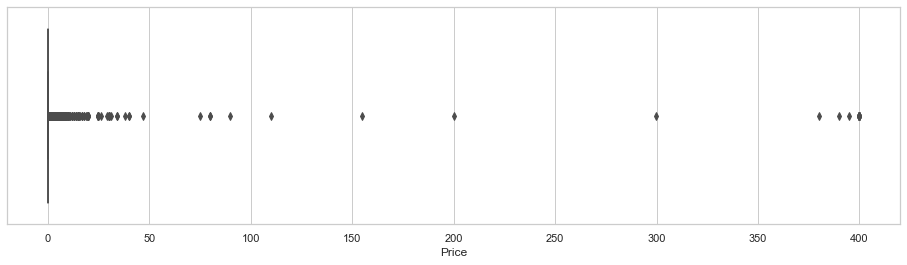

In [27]:
plt.figure(figsize=(16,4))
sns.set(style='whitegrid')
sns.boxplot(x='Price', data=df, palette ='Set1');

    

In [28]:

(df['Price']>200).sum()

17

In [29]:
df.drop(df[df['Price'] > 200].index, axis=0, inplace =True)

In [30]:
(df['Price']>200).sum()

0

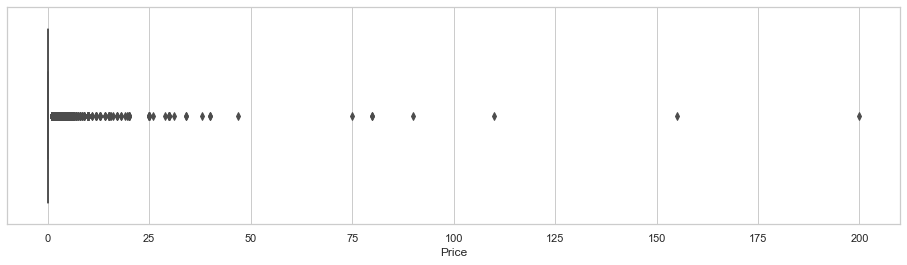

In [31]:
plt.figure(figsize=(16,4))
sns.set(style='whitegrid')
sns.boxplot(x='Price', data=df, palette ='Set1');

In [32]:
(df['Price']>=30).sum()

14

In [33]:
df.drop(df[df['Price'] >=30].index, axis=0, inplace =True)

In [34]:
(df['Price']>=30).sum()

0

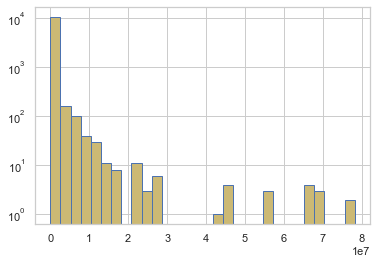

In [46]:
plt.hist(x= 'Reviews',bins=30,color ='Y',data=df,alpha=1,edgecolor='b',log=True);



In [47]:
(df['Reviews']>=1000000).sum()

704

In [49]:
df.drop(df[df['Reviews']>=1000000].index,axis=0,inplace=True)

In [50]:
(df['Reviews']>=1000000).sum()

0

In [51]:
quantile=df['Installs'].quantile(0.95)
quantile

10000000.0

In [52]:
(df['Installs']>quantile).sum()

199

In [54]:
df.drop(df[df['Installs']>quantile].index,axis=0,inplace=True)

In [55]:
(df['Installs']>quantile).sum()

0

Skewness =  -1.7434270330647985
Mean =  4.170800237107298
Mediam =  4.3
Mode =  0    4.3
dtype: float64


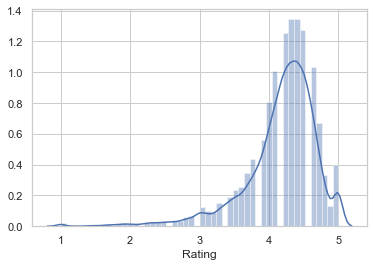

In [99]:
sns.distplot(df['Rating'])
print('Skewness = ',df.Rating.skew())
print("Mean = ",df.Rating.mean())
print("Mediam = ",df.Rating.median())
print("Mode = ",df.Rating.mode())

In [102]:
df.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Adults only 18+,3,3,3,3,3,3,3,3,3,3,3,3
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900
Unrated,1,1,1,1,1,1,1,1,1,1,1,1


In [118]:
df.drop(df[df['Content Rating']=='Unrated'].index, axis=0, inplace=True)
df.drop(df[df['Content Rating']=='Adults only 18+'].index, axis=0, inplace=True)

In [119]:
df.groupby('Content Rating').count()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900


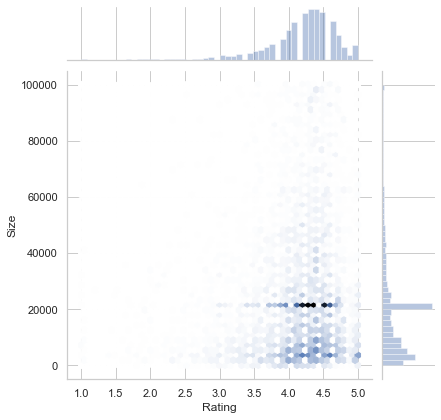

In [128]:
sns.jointplot(x='Rating',y='Size',data=df,kind='hex')

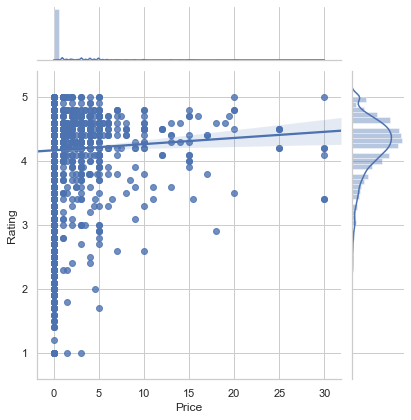

In [130]:
sns.jointplot(x='Price',y='Rating',data=df,kind='reg')

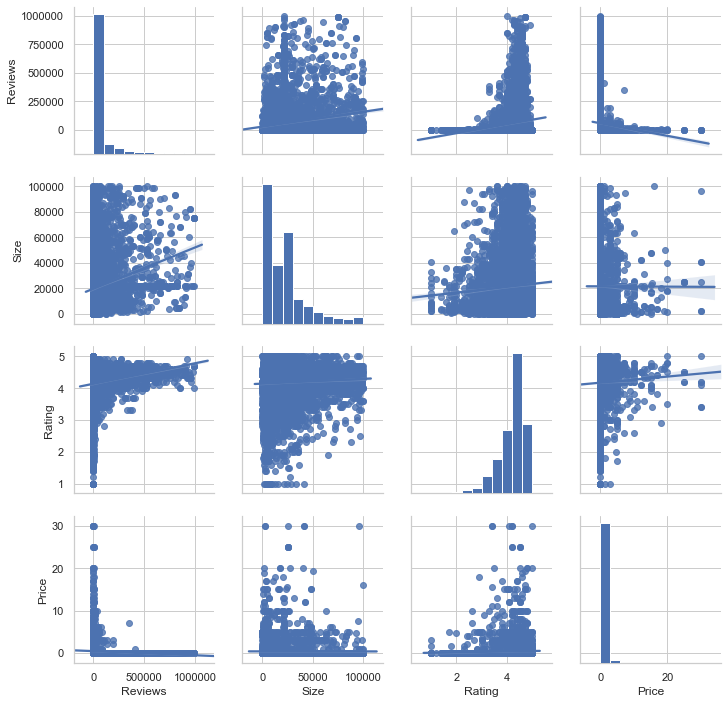

In [136]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')

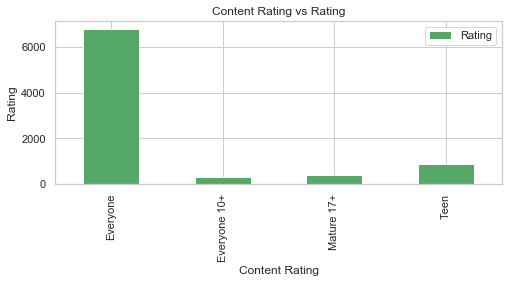

In [158]:
fig = plt.figure(figsize = (8, 3))
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="g")
plt.ylabel('Rating')
plt.title('Content Rating vs Rating')
plt.legend()

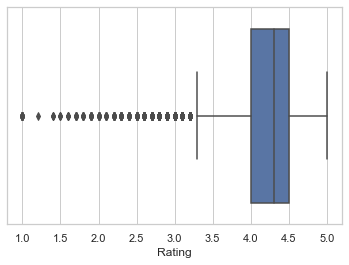

In [155]:
sns.boxplot(x='Rating',data=df)

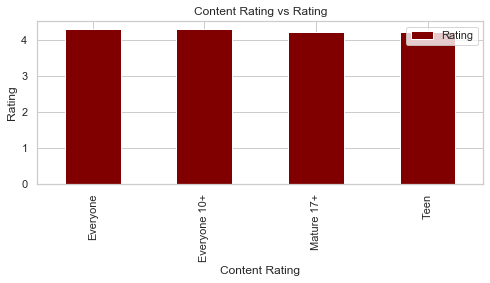

In [160]:
fig = plt.figure(figsize = (8, 3))
df.groupby(['Content Rating'])['Rating'].median().plot.bar(color="maroon")
plt.ylabel('Rating')
plt.title('Content Rating vs Rating')
plt.legend()

In [179]:
df['sd']=pd.qcut(df['Size'],q=5)

In [180]:
df.sd.value_counts()

(12000.0, 21516.0]     2310
(4600.0, 12000.0]      1789
(7.999, 4600.0]        1713
(32000.0, 100000.0]    1682
(21516.0, 32000.0]      937
Name: sd, dtype: int64

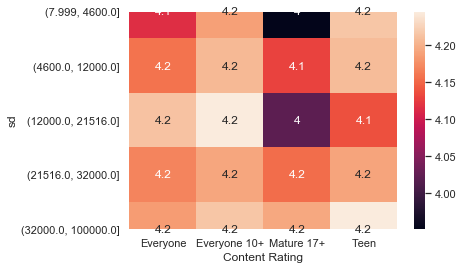

In [184]:
pivo=df.pivot_table(columns='Content Rating',index='sd',values='Rating')
sns.heatmap(pivo,annot=True);

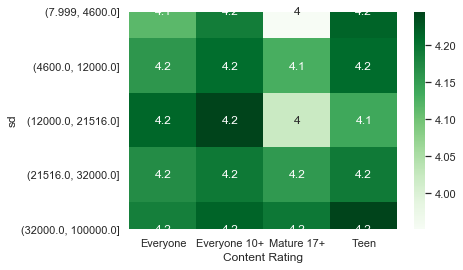

In [190]:
sns.heatmap(pivo,cmap='Greens',annot=True);